In [1]:
import numpy as np
import pandas as pd
import pywt
import scaleogram as scg

---
# Import data

In [2]:
dataset = pd.read_csv('SP-280-Leste.csv', sep=',',header=None)
dataset.head()

,0,1,2,3
0,1,01/09/2011 00:00,37,89.0
1,2,01/09/2011 00:05,48,82.0
2,3,01/09/2011 00:10,26,85.0
3,4,01/09/2011 00:15,47,81.0
4,5,01/09/2011 00:20,52,82.0


## Clean and organize dataset

+ ### Organize the dataset

    Organize the columns, remove some not useful data, rename the columns and convert each column to your correct unit.

+ ### Date-time columns

    Working with date-time date requires to change the index DataFrame to the column that contain Date-Time values


In [3]:
'''Organize'''
# Drop the column '0'
dataset = dataset.drop(columns=0)

# Rename columns
dataset = dataset.rename(columns={0:"ID", 1:"DateTime",2:"Flow[veh/h.lane]", 3:"Speed[km/h]" })

# Calculate the Flow rate
dataset["Flow[veh/h.lane]"] = dataset["Flow[veh/h.lane]"] * 60 / 5 / 2 # two lanes

# Calculate the Density
dataset["Density[veh/km.lane]"] = dataset["Flow[veh/h.lane]"] / dataset['Speed[km/h]']

# Convert to Datetime
dataset['DateTime'] = pd.to_datetime(dataset['DateTime'], format='%d/%m/%Y %H:%M')

'''Date-time column index'''
dataset.set_index('DateTime',inplace=True)
dataset.head()

,Flow[veh/h.lane],Speed[km/h],Density[veh/km.lane]
DateTime,,,
2011-09-01 00:00:00,222.0,89.0,2.494382
2011-09-01 00:05:00,288.0,82.0,3.512195
2011-09-01 00:10:00,156.0,85.0,1.835294
2011-09-01 00:15:00,282.0,81.0,3.481481
2011-09-01 00:20:00,312.0,82.0,3.804878


+ ### Missing values

    Verifying some missing values in dataset


In [4]:
dataset.isna().sum()

Flow[veh/h.lane]         0
Speed[km/h]              1
Density[veh/km.lane]    39
dtype: int64

In [5]:
dataset = dataset.fillna(0.0)
dataset.isna().sum()

Flow[veh/h.lane]        0
Speed[km/h]             0
Density[veh/km.lane]    0
dtype: int64

---
# Wavelet Analysis

## Applying Wavelet functions
+ using Haar Wavelet for each traffic variable

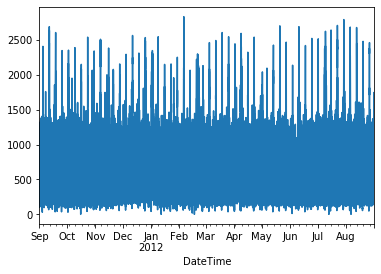

In [23]:
dataset['Flow[veh/h.lane]'].plot()

In [24]:
data = np.array(dataset['Flow[veh/h.lane]'])

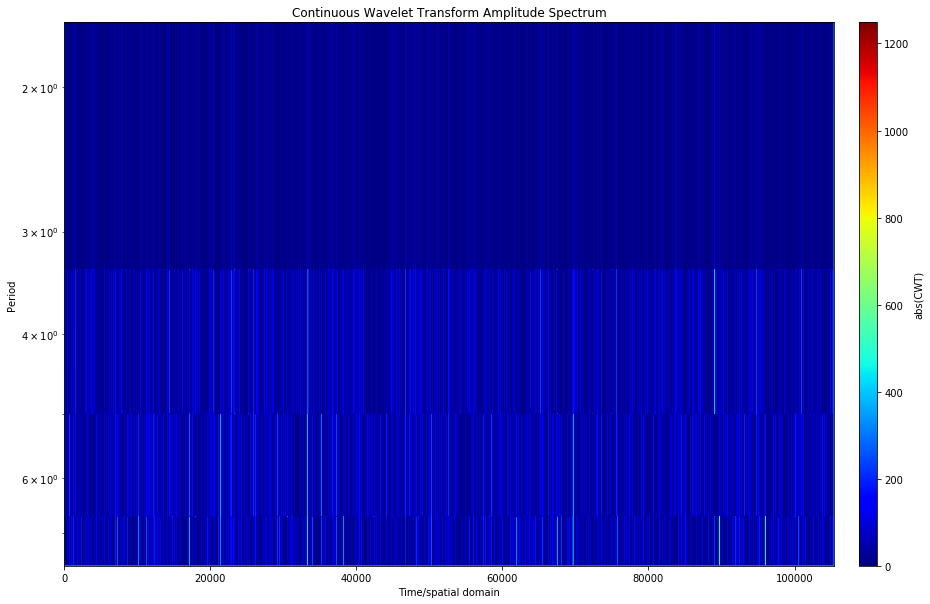

In [34]:
scg.cws(data, scales=np.arange(1,5), wavelet='gaus8', figsize=(15,10), yscale='log')

In [18]:
pywt.wavelist(kind='continuous')

['cgau1',
 'cgau2',
 'cgau3',
 'cgau4',
 'cgau5',
 'cgau6',
 'cgau7',
 'cgau8',
 'cmor',
 'fbsp',
 'gaus1',
 'gaus2',
 'gaus3',
 'gaus4',
 'gaus5',
 'gaus6',
 'gaus7',
 'gaus8',
 'mexh',
 'morl',
 'shan']